# Import Libraries

In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Read Data 

In [2]:
train="C:\\Desktop\\DL Project\\archive (25)\\fruits-360_dataset\\fruits-360\\Training"
file_names=os.listdir(train)
pd.DataFrame(file_names,columns=['Names'])

,Names
0,Apple Braeburn
1,Apple Crimson Snow
2,Apple Golden 1
3,Apple Golden 2
4,Apple Golden 3
...,...
126,Tomato Maroon
127,Tomato not Ripened
128,Tomato Yellow
129,Walnut


In [3]:
size_number=[]
size=[]
for file in file_names:
    path=os.path.join(train,file)
    size_number.append(len(os.listdir(path)))
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        size.append(image.shape)
pd.DataFrame(size_number,columns=['size'],index=file_names)    

,size
Apple Braeburn,492
Apple Crimson Snow,444
Apple Golden 1,480
Apple Golden 2,492
Apple Golden 3,481
...,...
Tomato Maroon,367
Tomato not Ripened,474
Tomato Yellow,459
Walnut,735


In [6]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])    

,Number
"(100, 100, 3)",67692


In [7]:
train_image=[]
label=[]
for file in file_names:
    path=os.path.join(train,file)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        train_image.append(image)
        label.append(file)
pd.DataFrame(label,columns=['label'])        

,label
0,Apple Braeburn
1,Apple Braeburn
2,Apple Braeburn
3,Apple Braeburn
4,Apple Braeburn
...,...
67687,Watermelon
67688,Watermelon
67689,Watermelon
67690,Watermelon


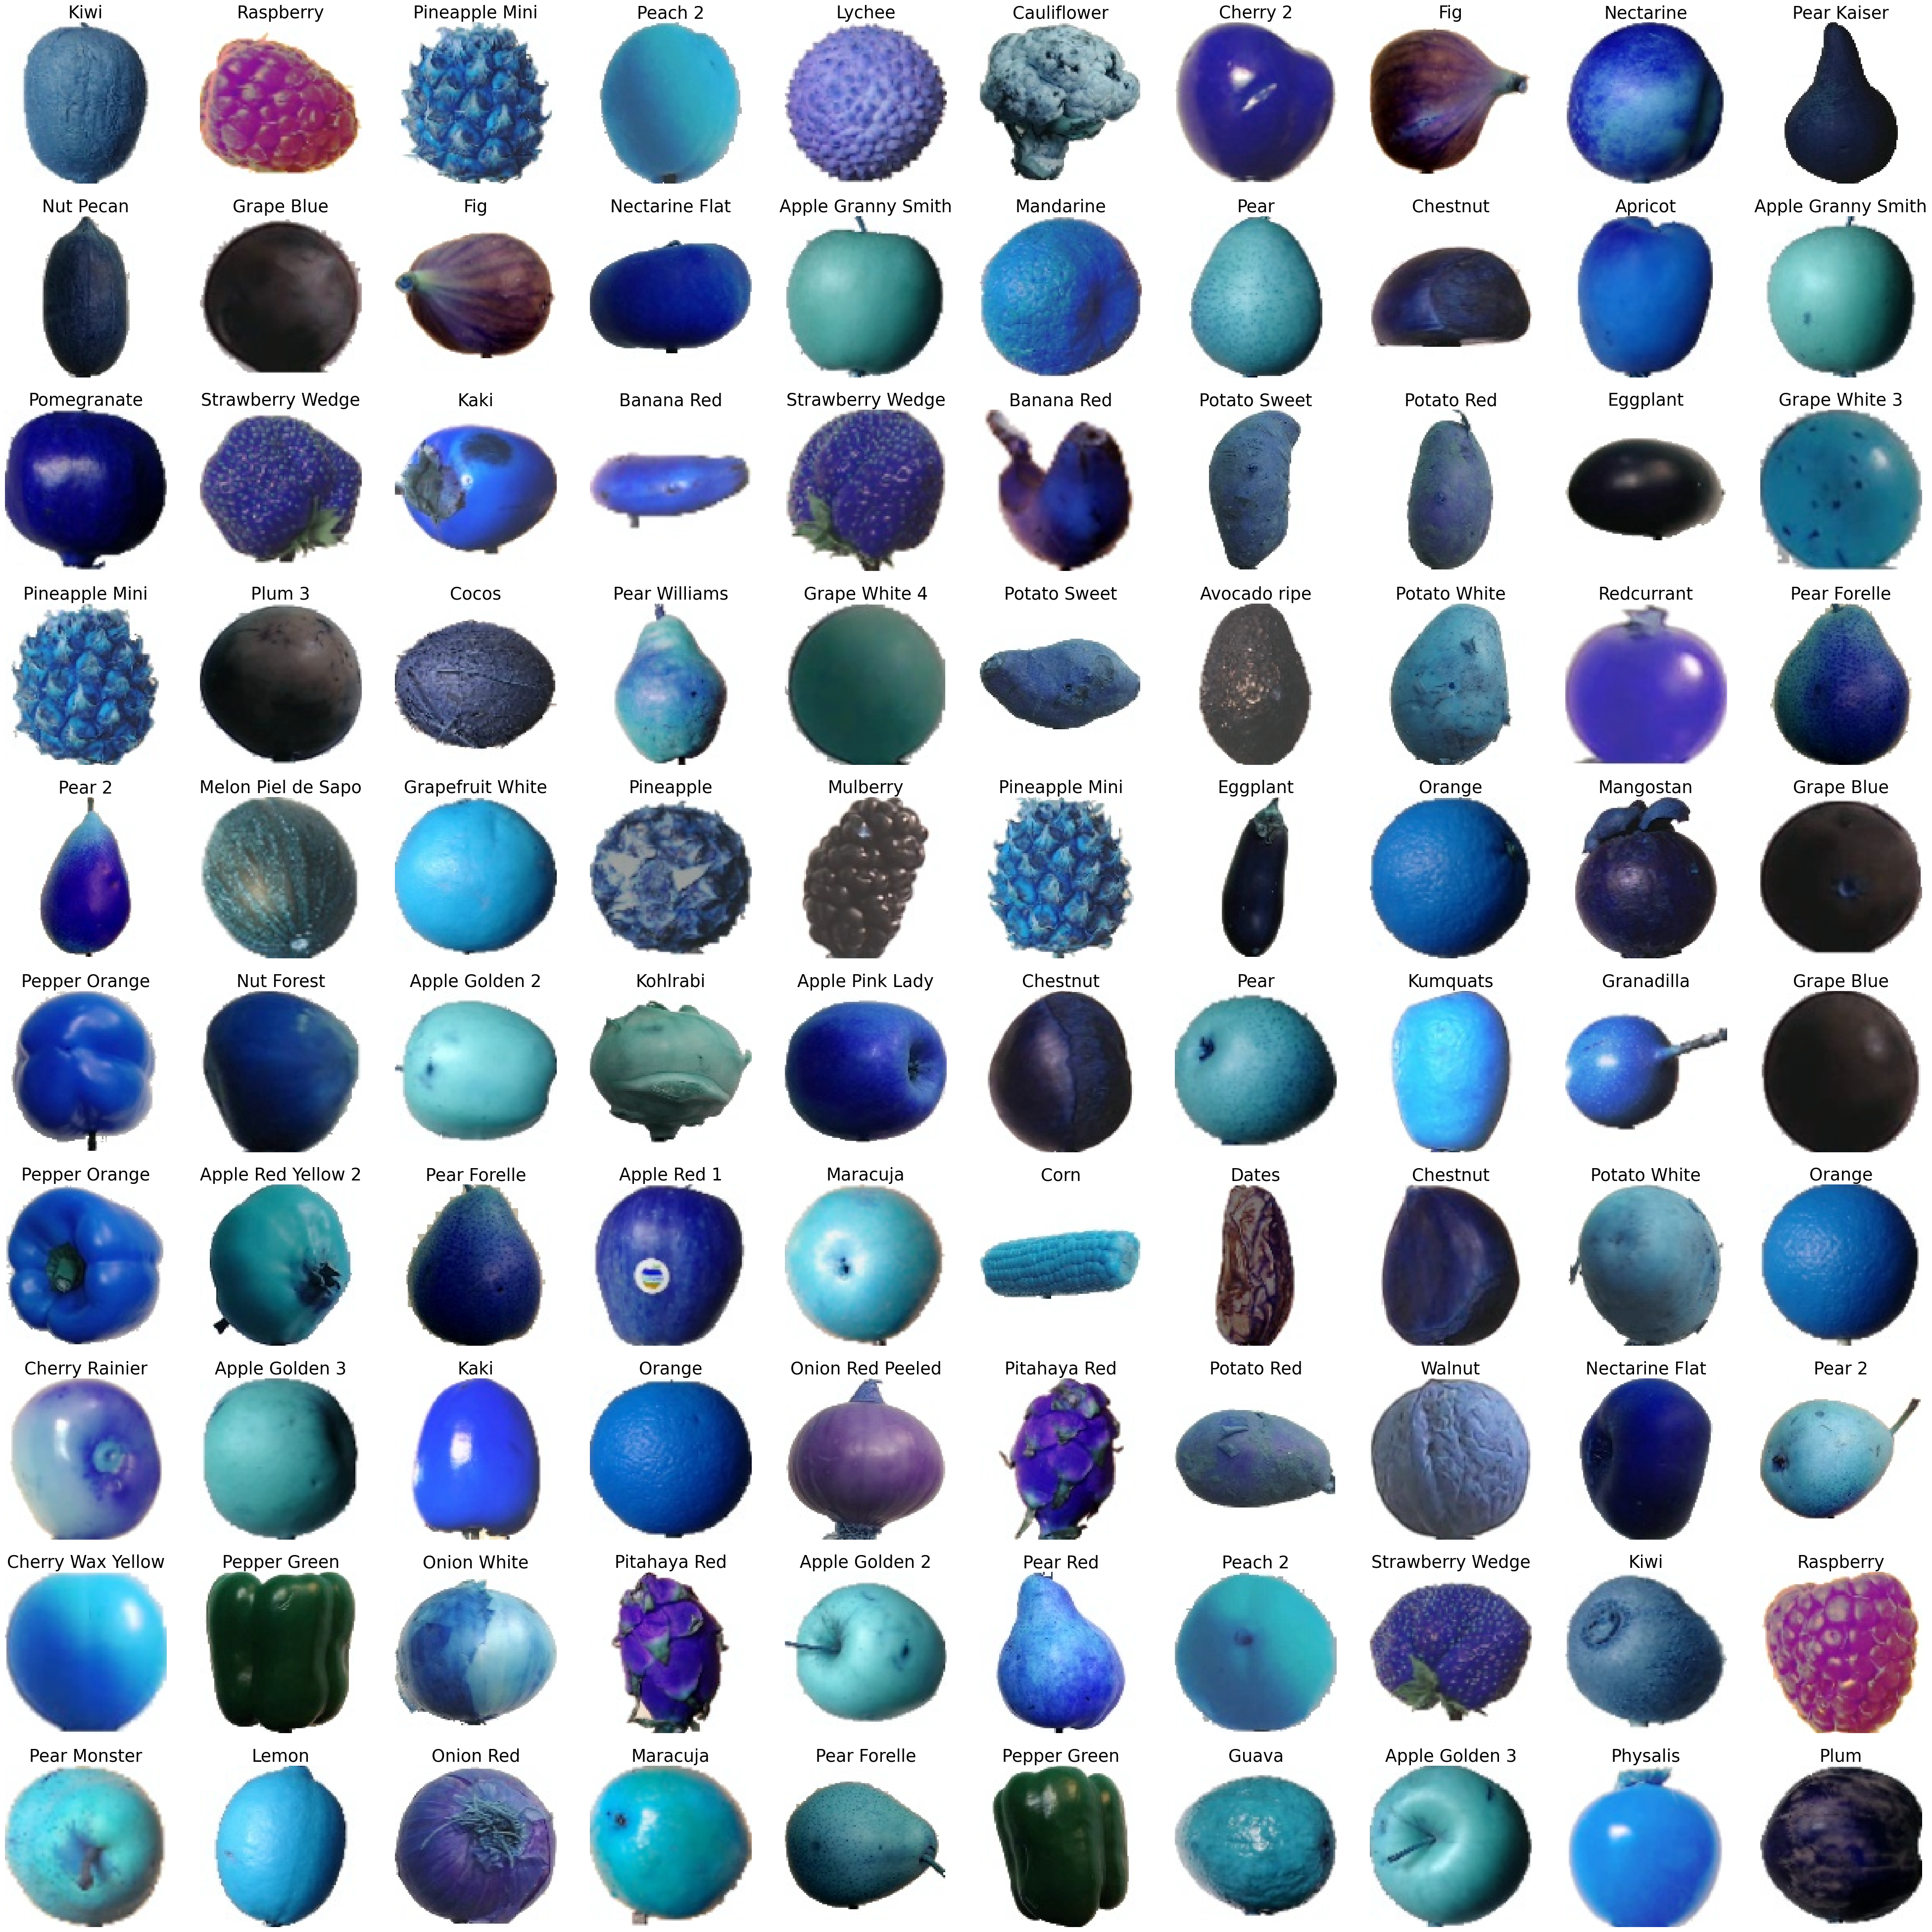

In [8]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train_image),100)):
    plt.subplot(10,10,n+1)
    plt.imshow(train_image[i])
    plt.axis('off')
    plt.title(label[i],fontsize=25)

In [9]:
train_image=np.array(train_image)
label=np.array(label)

In [10]:
code={}
label_uniqe=list(pd.unique(label))
for i in range(131):
    code[label_uniqe[i]]=i
code    

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [11]:
def get_Name(N):
    for x,y in code.items():
          if y==N:
                return x
label2=[]
for i in label:
    label2.append(code[i])
label2=np.array(label2)
pd.DataFrame(label2)

,0
0,0
1,0
2,0
3,0
4,0
...,...
67687,130
67688,130
67689,130
67690,130


# Splitting data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_image, label2, test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60922, 100, 100, 3)
X_test shape is  (6770, 100, 100, 3)
y_train shape is  (60922,)
y_test shape is  (6770,)


# Model Building

In [13]:
shape=(100,100,3)
num_class=131
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(num_class,activation=tf.nn.softmax))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       2

In [16]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1904/1904 [==============================] - 600s 314ms/step - loss: 1.2647 - accuracy: 0.6533
Epoch 2/10
1904/1904 [==============================] - 548s 288ms/step - loss: 0.3248 - accuracy: 0.8944
Epoch 3/10
1904/1904 [==============================] - 661s 347ms/step - loss: 0.2263 - accuracy: 0.9269
Epoch 4/10
1904/1904 [==============================] - 683s 359ms/step - loss: 0.1775 - accuracy: 0.9446
Epoch 5/10
1904/1904 [==============================] - 534s 280ms/step - loss: 0.1640 - accuracy: 0.9490
Epoch 6/10
1904/1904 [==============================] - 533s 280ms/step - loss: 0.1392 - accuracy: 0.9579
Epoch 7/10
1904/1904 [==============================] - 555s 291ms/step - loss: 0.1347 - accuracy: 0.9599
Epoch 8/10
1904/1904 [==============================] - 547s 287ms/step - loss: 0.1167 - accuracy: 0.9657
Epoch 9/10
1904/1904 [==============================] - 536s 281ms/step - loss: 0.1055 - accuracy: 0.9689
Epoch 10/10
1904/1904 [=======================

In [17]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy
0,1.264737,0.653294
1,0.324840,0.894357
2,0.226324,0.926857
3,0.177478,0.944552
4,0.163999,0.949017
5,0.139174,0.957881
6,0.134732,0.959883
7,0.116739,0.965677
8,0.105483,0.968911
9,0.101883,0.970503


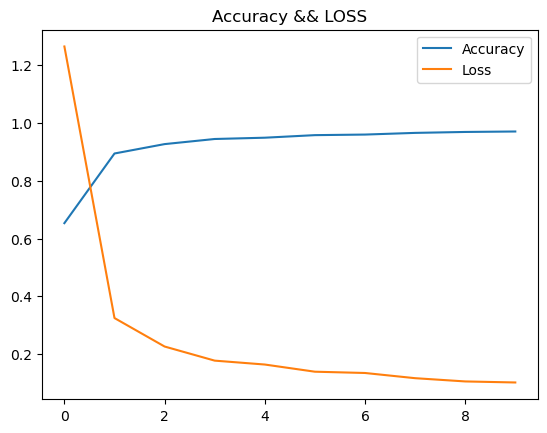

In [18]:
plt.plot(hist_['accuracy'],label='Accuracy')
plt.plot(hist_['loss'],label='Loss')
plt.title('Accuracy && LOSS')
plt.legend()

In [19]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

212/212 [==============================] - 15s 69ms/step - loss: 0.0459 - accuracy: 0.9849
Test Loss = 0.04589206725358963
Test Accuracy = 0.9849335551261902


In [20]:
y_pred=model.predict(X_test)
y_pred

212/212 [==============================] - 14s 66ms/step


array([[1.8583142e-17, 3.6002407e-10, 5.9228930e-20, ..., 3.5345062e-14,
        3.8000770e-16, 4.6579771e-16],
       [8.3574057e-26, 8.7250857e-38, 1.7583441e-31, ..., 0.0000000e+00,
        0.0000000e+00, 2.1032976e-32],
       [1.0325509e-29, 1.4169765e-16, 7.3147342e-23, ..., 3.0548072e-26,
        1.5333366e-19, 2.7994959e-27],
       ...,
       [6.4725797e-20, 3.3947969e-17, 3.2638039e-21, ..., 2.6426752e-21,
        7.6100017e-19, 4.2920059e-21],
       [0.0000000e+00, 5.2640386e-33, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9572166e-38, 2.4024995e-32, 0.0000000e+00, ..., 4.9649272e-36,
        4.1801226e-36, 5.8268651e-20]], dtype=float32)

In [21]:
pred_Name=[]
pred_number=[]
for row in y_pred:
    N=np.argmax(row)
    pred_Name.append(get_Name(N))
    pred_number.append(N)
pd.DataFrame(pred_Name,columns=['pred Names'])    

,pred Names
0,Tomato 3
1,Pitahaya Red
2,Pear Red
3,Raspberry
4,Pear Monster
...,...
6765,Pomegranate
6766,Pear Williams
6767,Eggplant
6768,Fig


In [22]:
pd.DataFrame(pred_number,columns=['pred Number']) 

,pred Number
0,122
1,101
2,89
3,113
4,88
...,...
6765,105
6766,91
6767,40
6768,41


# Calculating classification Report : 

In [28]:
ClassificationReport = classification_report(y_test,pred_number)
print('Classification Report is:', ClassificationReport )

Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        55
           3       1.00      0.75      0.85        51
           4       0.87      0.98      0.92        49
           5       1.00      0.84      0.91        43
           6       1.00      0.98      0.99        57
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        45
          11       1.00      1.00      1.00        41
          12       1.00      0.99      0.99        79
          13       1.00      1.00      1.00        56
          14       1.00      1.00      1.00        43
          15       1.00      1.00      1.00        48
          16       1.00      1.00      1.00        55
 